In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.info()

In [ ]:
df.head(10)

In [ ]:
df.describe()

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
x = df.drop('label', axis=1)

In [ ]:
labels = df.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(18285, 5)

In [ ]:
news = df.copy()

In [ ]:
news.reset_index(inplace=True)

In [ ]:
labels = news.label

In [ ]:
news

,index,id,title,author,text,label,ctitle,ctext
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired,why the truth might get you fired october 29 2...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike hav...,videos 15 civilians killed in single us airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,iranian woman jailed for fictional unpublished...,print \r\nan iranian woman has been sentenced ...
...,...,...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper ti trump a ’poster child for white supr...,rapper t i unloaded on black celebrities who m...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,nfl playoffs schedule matchups and odds the n...,when the green bay packers lost to the washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macy’s is said to receive takeover approach by...,the macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia to hold parallel exercises in balkans,nato russia to hold parallel exercises in balk...


In [ ]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(news['text'], labels, test_size=0.2, random_state=7)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.64%


In [ ]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[2020,   57],
       [  66, 1514]])

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), display_labels=['fake', 'real'])
plt.show()

#eda

In [ ]:
n2=news

NameError: ignored

In [ ]:
dfe=df

In [ ]:
dfe

In [ ]:
import re
# For handling string
import string
# For performing mathematical operations
import math

In [ ]:

dfe.isnull().sum()

In [ ]:
dfe['author'].unique()

In [ ]:
for index,text in enumerate(n2['text'][35:40]):
  print('news %d:\n'%(index+1),text)

In [ ]:
for index,text in enumerate(n2['title'][35:40]):
  print('news %d:\n'%(index+1),text)

In [ ]:
n2 = 

In [ ]:
for index,text in enumerate(dfe['text'][35:40]):
  print('news %d:\n'%(index+1),text)

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [ ]:

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))


In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


In [ ]:
# Expanding Contractions in the reviews
dfe['text']=dfe['text'].apply(lambda xl:expand_contractions(xl))

In [ ]:
n2['text']=n2['text'].apply(lambda xl:expand_contractions(xl))

In [ ]:
n2['title']=n2['title'].apply(lambda xl:expand_contractions(xl))

In [ ]:
dfe['cleaned']=dfe['text'].apply(lambda xl: xl.lower())

In [ ]:
n2['ctitle']=n2['title'].apply(lambda xl: xl.lower())

In [ ]:
n2['ctext']=n2['text'].apply(lambda xl: xl.lower())

In [ ]:
dfe

In [ ]:
dfe['cleaned']=dfe['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
n2['ctitle']=n2['ctitle'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
n2['ctext']=n2['ctext'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
dfe['cleaned']=dfe['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
dfe

#model

In [ ]:
n2

,index,id,title,author,text,label,ctitle,ctext
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus bre...,ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired,why the truth might get you fired october 29 2...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike hav...,videos 15 civilians killed in single us airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,iranian woman jailed for fictional unpublished...,print \r\nan iranian woman has been sentenced ...
...,...,...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper ti trump a ’poster child for white supr...,rapper t i unloaded on black celebrities who m...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,nfl playoffs schedule matchups and odds the n...,when the green bay packers lost to the washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macy’s is said to receive takeover approach by...,the macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia to hold parallel exercises in balkans,nato russia to hold parallel exercises in balk...


In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(n2['text'], labels, test_size=0.2, random_state=6)

In [ ]:
x3=n2.drop('label',axis=1)
y3=n2['label']

In [ ]:
x2_test

In [ ]:
y2_train

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.7 )

# Fit and transform train set, transform test set
tfidf_train2 = tfidf_vectorizer2.fit_transform(x2_train) 
tfidf_test2 = tfidf_vectorizer2.transform(x2_test)

In [ ]:
# Initialize a PassiveAggressiveClassifier
pac2 = PassiveAggressiveClassifier(max_iter=70)
pac2.fit(tfidf_train2,y2_train)

# Predict on the test set and calculate accuracy
y2_pred = pac2.predict(tfidf_test2)
score2 = accuracy_score(y2_test,y2_pred)
print(f'Accuracy: {round(score2*100,2)}%')

Accuracy: 96.14%


In [ ]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2)

In [ ]:
x3=x3.drop('index',axis=1)


In [ ]:
x3=x3.drop('title',axis=1)

In [ ]:
x3=x3.drop('text',axis=1)

In [ ]:
x3

In [ ]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2)

In [ ]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features[''][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)#Getting the target variable
y=clean_news['output']

In [ ]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [ ]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [ ]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

NameError: ignored

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

In [ ]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

#ext

In [ ]:

for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
dfeh=dfe.head(100)

In [ ]:
dfeh

In [ ]:
# Lemmatization with stopwords removal
dfeh['lemmatized']=dfeh['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfeh

In [ ]:
dfeh_grouped=dfeh[['author','lemmatized']].groupby(by='author').agg(lambda x:' '.join(x))
dfeh_grouped.head()

In [ ]:
# Creating Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(dfeh_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=dfeh_grouped.index
df_dtm.head(3)

,000,0144,063,08,080808,10,100,1000,100000,10000aplate,1012,1015,101st,109,10th,10usa,11,1118,112,113,117,119,11th,12,120,12000,123,125,128,128970,129,129170,12920,129453,129585,129608,129610,13,130175,130375,...,yeah,year,yearlong,yearn,yell,yello,yellow,yemen,yes,yesman,yesterday,yield,yinon,yoda,yoga,york,yoshinori,young,youth,youtube,youâ,yt,yuan,yugoslavia,yusif,zatzman,zeal,zealand,zemanick,zero,zerohedge,zika,zimmerman,zioukraine,zombie,zombifie,zone,zonesconfuse,дня,хорошего
author,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A. O. Scott,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AWR Hawkins,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aaron E. Carroll,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [ ]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

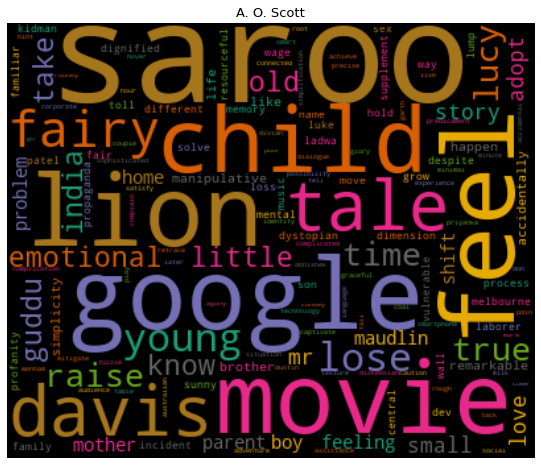

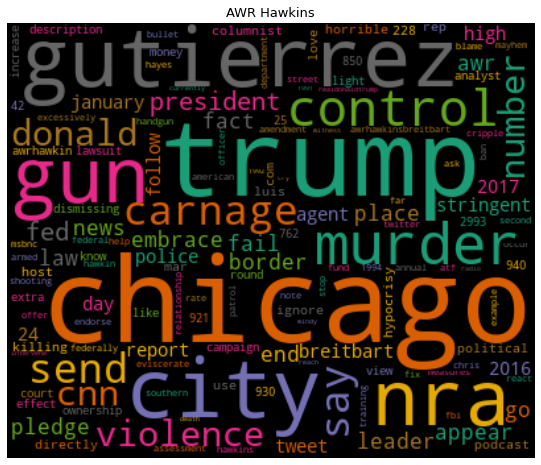

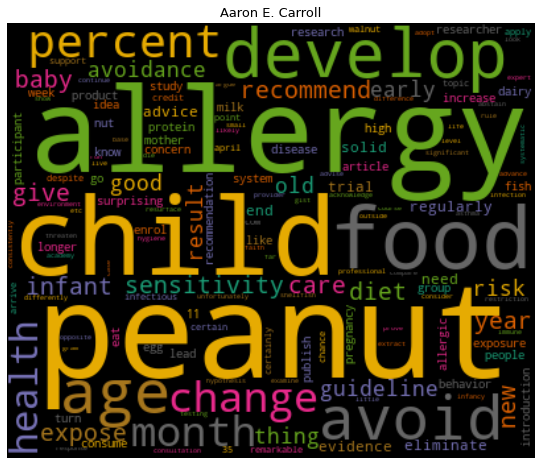

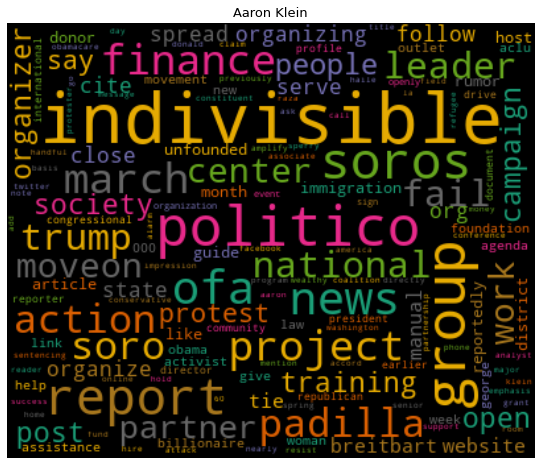

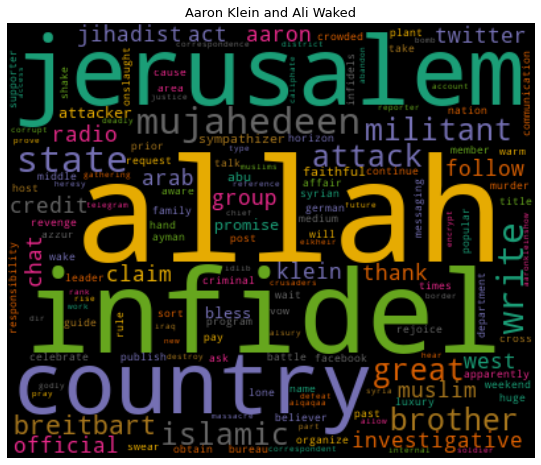

ZeroDivisionError: ignored

In [ ]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:
from textblob import TextBlob
dfeh['polarity']=dfeh['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(dfeh.iloc[dfeh['polarity'].sort_values(ascending=False)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(dfeh.iloc[dfeh['polarity'].sort_values(ascending=True)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

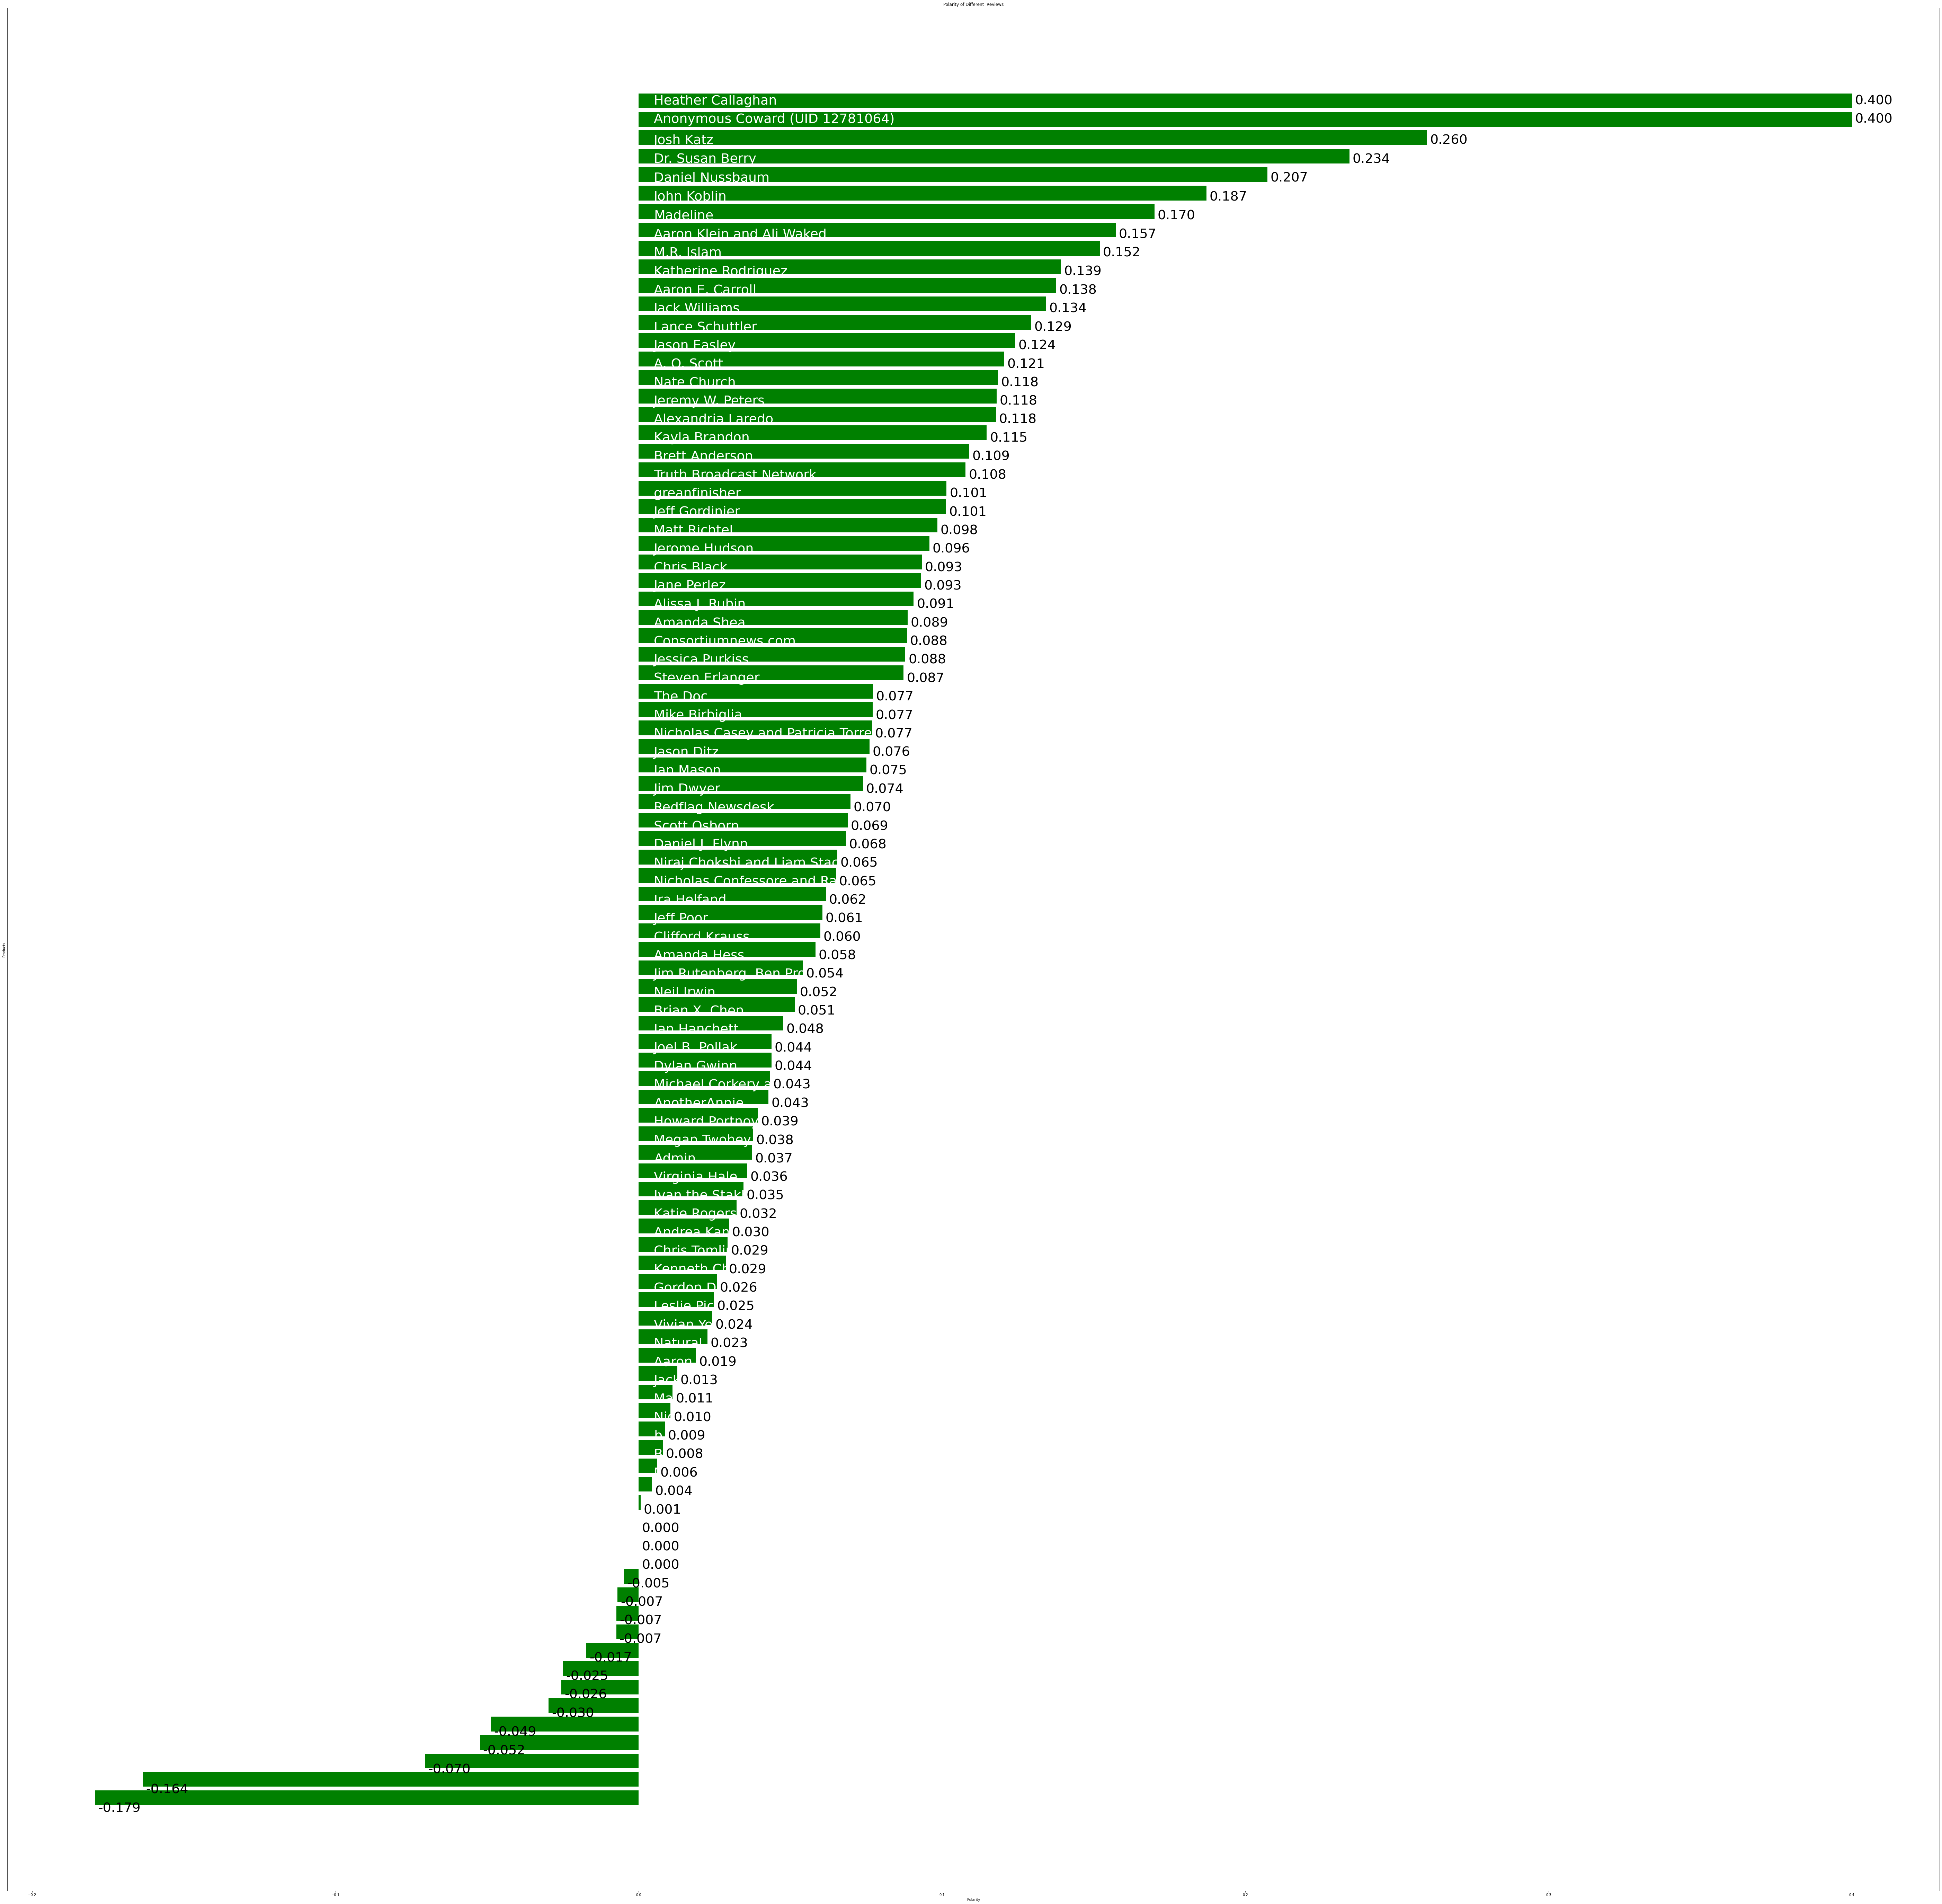

In [ ]:

product_polarity_sorted=pd.DataFrame(dfeh.groupby('author')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(100,100))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different  Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='green',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=38,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=38,color='black')
  
plt.yticks([])
plt.show()

In [ ]:
recommend_percentage=pd.DataFrame(((dfeh.groupby('author')['reviews.doRecommend'].sum()*100)/dfeh.groupby('author')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(100,80))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=38,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=38,color='black')

plt.yticks([])
plt.show()

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])